
# Introduction to Multinomial Responses

### Econometrics B (ØkB)

**Bertel Schjerning**  
Department of Economics, University of Copenhagen  

### Readings:  
- [Train, Ch. 3 Logit](https://eml.berkeley.edu/books/choice2nd/Ch03_p34-75.pdf)
- Wooldridge ch. 16 (suplementary)

### References:  
- Wooldridge, J.M. (2010). *Econometric Analysis of Cross Section and Panel Data*, 2nd ed., MIT Press, Ch. 16.  
- Train, K. (2009). *Discrete Choice Methods with Simulation*, 2nd ed., Cambridge University Press.
[Download 1st ed. of book](https://eml.berkeley.edu/books/choice2.html)  




## Why Discrete Choice Models?

- Many economic decisions involve choosing **one among many alternatives**:  
  - Which mode of transport? (**Car, bus, train**)  
  - Which product to buy? (**iPhone, Samsung, Google Pixel**)  
  - Which university program to apply for? (**Ranked application system in Denmark**)  

- **Choices come from a finite set**, requiring models that capture **utility differences across alternatives**.  

### Types of Discrete Responses and Suitable Models  

- **Binary Choice** (Work or not work) → **Binary Logit / Probit**  
- **Unordered Choice** (Transportation mode, product purchase, educational choice) <br>→ **Multinomial Logit, Nested Logit, Mixed Logit**  
- **Ordered Choice** (Lecturer rating: Awful, Acceptable, Awesome) → **Ordered Logit / Ordered Probit**  
- **Ranked Choice** (University admissions, job applications) → **Exploded Logit, Rank-Ordered Logit**  
- **Count Data** (Homepage visits, COVID cases) → **Poisson, Negative Binomial Regression**  

We focus on **unordered choices**, where consumers select the option with the highest utility.  

## Today: Unordered Multinomial Responses  

- **Individuals $i$ choose among $J$ mutually exclusive alternatives**  
  - **Education** (MSc, BSc, High School)  
  - **Transport** (Car, Bus, Train)  
  - **Car Brand** (Ford, BMW, Tesla)  

- **Deja vi from Econometrics A**: Logit demand model for **market shares in car demand** (OLS/IV/GMM)  
- **Now**: Model **individual choices** and derive choice probabilities (estimate with MLE) 
- **Later**: Return to **market shares** formulation aggreating individual choices (estimate with GMM)

## Extending binary choice models to **multiple alternatives**.

- Interested in modeling the conditional choice probability (CCP) for a finite number of alternatives, $j\in\{0,\ldots,J\}$

$$p_j(x)=P(y=j|x) \in (0,1)$$ 


- Because alternatives are *mutually exclusive*, CCPs sum to 1 

$$\sum_{j\in\{0,\ldots,J\}} p_j(x)=1$$

- So $p_0(x)=P(y=0|x)$ is determined once we know $p_j(x)$ for $j\in\{1,\ldots,J\}$

$$p_0(x)=1-\sum_{j=1}^J p_j(x)$$

- **How do we model $p_j(x)$?**  
  - Need a **structural model**  
  - This leads us to the **Random Utility Model (RUM)**  



# The Random Utility Model (RUM)

## The Random Utility Model (RUM)

**Decision rule**  
$$ y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}, \quad u_{ij} = v_{ij} + \varepsilon_{ij} $$  

- **Setup**:  
  - $i=1,\ldots,N$ (individuals), $j=0,\ldots,J$ (alternatives)  
  - $y_i$ = chosen alternative  
  - $u_{ij}$ = total utility  
  - $v_{ij}$ = deterministic utility  
  - $\varepsilon_{ij}$ = stochastic term (observed by decision maker, not econometrician)  

**Key Models**  
- **Logit models**: $\varepsilon_{ij} \sim$ i.i.d. extreme value  
- **Conditional Logit**: $v_{ij} = x_{ij} \beta$  
- **Multinomial Logit**: $v_{ij} = x_i \beta_j$  
- **Combined Logit**: $v_{ij} = z_{ij}' \beta + w_i \gamma_j$  

**Implications**  
- Logit assumes **Independence of Irrelevant Alternatives (IIA)**  
- **Are these assumptions realistic?**  
- **How can they be relaxed? (Nested Logit, Mixed Logit, Random Coefficients Logit)**  

## More on Utility  

The observed component of utility, $v_{ij} = v(w_i, z_{ij})$, **does not have to be linear**.  

### Examples:  

- **Indirect Utility in Static Optimization**  
  - When utility depends on another choice variable $c$:  
    $$ v_{ij} = \max_c \tilde{v}_{ij}(c) $$  

- **Choice-Specific Value Function in Dynamic Models**  
  - When choices impact future states:  
    $$ v(x, j) = \tilde{u}(x, j) + \rho \int V(x') p(x' | x, j) dx' $$  
  - With **expected value function**:  
    $$ V(x) = \int_\varepsilon \max_j (v(x, j) + \varepsilon_j) d\varepsilon = \log \sum_j \exp(v(x, j)) $$  
  - Where:  
    - $\rho$ = discount factor  
    - $p(x' | x, j)$ = transition density of state variables  

## Choice probabilities
- From the **random utility model**:  
$$y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}
\qquad\qquad
u_{ij} = v_{ij} + \varepsilon_{ij}$$
- Probability of choosing $j$:  
$$\begin{array}{lcl}
p_{ij} \equiv P(y_i = j) 
&=& P(u_{ij} > u_{ik} \quad\forall k\neq j) \\[1ex]
&=& P(v_{ij} + \varepsilon_{ij} > v_{ik} + \varepsilon_{ik} \quad\forall k\neq j) \\[1ex]
&=& P(\varepsilon_{ik}-\varepsilon_{ij} < v_{ij}-v_{ik} \quad\forall k\neq j) \\[1ex]
\end{array}$$

- The expression for $p_{ij}$ **depends on the distribution** of $\varepsilon_{ij}$ 
    - How to choose the distribution of $\varepsilon_{ij}$? 
    - What will be the implied distribution of $\varepsilon_{ik}-\varepsilon_{ij}$?
    - Popular choice for $\varepsilon_{ij}$ is the *Type 1 Extreme Value (Gumbel) Distribution*

## Type 1 Extreme Value (Gumbel) Distribution (Location-Scale Form)
For location $\mu$ and scale $\sigma$:  
$$
F(\varepsilon) = \exp\left\{-\exp\left(-\frac{\varepsilon - \mu}{\sigma}\right)\right\}, \quad
f(\varepsilon) = \frac{1}{\sigma} \exp\left\{-\frac{\varepsilon - \mu}{\sigma} - \exp\left(-\frac{\varepsilon - \mu}{\sigma}\right)\right\}
$$  
- **Limit distribution** for max of $N$ i.i.d. random variables as $N \to \infty$.  
- **Mean:** $\mu + \gamma\sigma$, where $\gamma \approx 0.577$ (Euler-Mascheroni constant).  
- **Variance:** $\frac{\pi^2}{6} \sigma^2$.

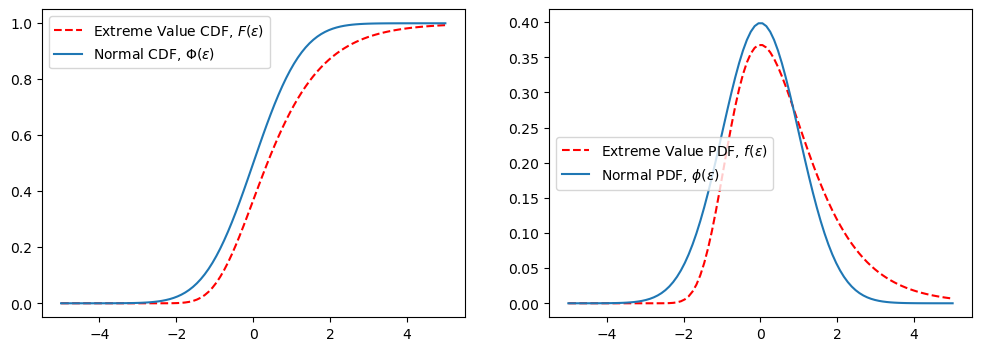

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
μ, σ = 0, 1  # Location and scale 
# μ, σ  = -0.5772 * (6 / np.pi**2)**0.5, (6 / np.pi**2)**0.5 # uncomment to set E(ε)=0, var(ε)=1
ε = np.linspace(-5, 5, 100)
F = lambda ε: np.exp(-np.exp(-(ε - μ) / σ))
f = lambda ε: (1 / σ) * np.exp(-(ε - μ) / σ - np.exp(-(ε - μ) / σ))
Φ, ϕ = norm.cdf, norm.pdf  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(ε, F(ε), 'r--', ε, Φ(ε))
ax1.legend([r'Extreme Value CDF, $F(\varepsilon)$', r'Normal CDF, $\Phi(\varepsilon)$'])
ax2.plot(ε, f(ε), 'r--', ε, ϕ(ε))
ax2.legend([r'Extreme Value PDF, $f(\varepsilon)$', r'Normal PDF, $\phi(\varepsilon)$'])
plt.show()

## Why the Type 1 Extreme Value (EV) Distribution?  

<img src="img/evdist.png" width="900" height="400">

- The **EV distribution is right-skewed**, but only **error differences** in RUM matter:  
  $$ p_{ij} = P(\varepsilon_{ik} - \varepsilon_{ij} < v_{ij} - v_{ik}, \forall k \neq j) $$  

- If $\varepsilon_j, \varepsilon_k \sim$ i.i.d. EV, then  
  $$ \varepsilon_j - \varepsilon_k \sim \text{Logistic} $$  
  - This **logistic difference property** gives **closed-form logit probabilities** in the binary case.  
  - It also **extends to the multinomial case**, allowing us to derive **multinomial logit probabilities**:  
    $$ p_{ij} = \frac{\exp(v_{ij})}{\sum_{m=0}^{J} \exp(v_{im})} $$  

- The EV distribution is **max stable**:  
  - The **maximum** of $n$ i.i.d. EV-distributed variables remains EV-distributed.  
  - A **generalization leads to nested logit models**.  
  - **Contrast with normal distributions**: sums of normals remain normal.  

## Choice Probabilities  

For additive random utility models:  

$$
\begin{array}{lcl}
p_{ij}  
&=& P\left(u_{ij} > u_{im}, \forall m \neq j \right) \\
&=& P\left(v_{ij} + \varepsilon _{ij} > v_{im} + \varepsilon _{im}, \forall m \neq j \right) \\
&=& \int_{\varepsilon_{i0},\dots,\varepsilon_{iJ}} \mathbb{1} \left( \varepsilon_{im} - \varepsilon_{ij} < v_{ij} - v_{im}, \forall m \neq j \right) \\
&& \quad f\left( \varepsilon_{i0},\dots,\varepsilon_{iJ} \right) d\varepsilon_{i0} \dots d\varepsilon_{iJ} 
\end{array}
$$

- **Non-logit models require solving high-dimensional integrals** 
- **Error differences reduce dimension to $J$**, but still costly when $J$ is large  
- **Panel data worsens the problem**: If $\varepsilon_{ij}$ is a $T$-vector, dimension of integration scales with $J \times T$  
- **Logit avoids integration** and give **closed-form choice probabilities**, making estimation computationally feasible

### Logit: "Closed Form" Choice Probabilities  

**Start with additive RUM**:  
  $$ p_{ij} = P(v_{ij} + \varepsilon_{ij} > v_{im} + \varepsilon_{im}, \forall m \neq j) $$  

**Condition on $\varepsilon_{ij}$**:  
  $$ p_{ij} | \varepsilon_{ij} = P(\varepsilon_{im} < v_{ij} - v_{im} + \varepsilon_{ij}, \forall m \neq j \mid \varepsilon_{ij}) $$  

**Now assume $\varepsilon_{im} \sim$ i.i.d. EV:** <br>
Because EV-distributed errors are **independent**, the probability of all inequalities holding factorizes into product of probabilities

  $$ p_{ij} | \varepsilon_{ij} = \prod_{m \neq j} e^{-e^{-(\varepsilon_{ij} + v_{ij} - v_{im})}} $$  

**Conditioning on $\varepsilon_{ij}$ reduces the $(J+1)$-dimensional integral to a single integral**:  
  $$ p_{ij} = \int_{\varepsilon_{ij}} \left( \prod_{m \neq j} e^{-e^{-(\varepsilon_{ij} + v_{ij} - v_{im})}} \right) e^{-\varepsilon_{ij} - e^{-\varepsilon_{ij}}} d\varepsilon_{ij} $$  

**This integral has a closed-form solution, leading to the well-known logit formula**:  
  $$ p_{ij} = \frac{\exp(v_{ij})}{\sum_{m=0}^{J} \exp(v_{im})} $$  

(See next slide for the full derivation of the integral.)

### Solving the Integral
Noting that $v_{ij} - v_{ij} = 0$ and collecting terms, we get:

$$
\begin{array}{lcl}
p_{ij} &=& \int_{-\infty}^{\infty} \left(\prod_{m} e^{-e^{-(\varepsilon_{ij} + v_{ij} - v_{im})}}\right) e^{-\varepsilon_{ij}} d\varepsilon_{ij} \\[1em]
&=& \int_{-\infty}^{\infty} \exp\left(-\sum_{m} \exp(-(\varepsilon_{ij} + v_{ij} - v_{im}))\right) e^{-\varepsilon_{ij}} d\varepsilon_{ij} \\[1em]
&=& \int_{-\infty}^{\infty} \exp\left(-e^{-\varepsilon_{ij}} \sum_{m} \exp(-(v_{ij} - v_{im}))\right) e^{-\varepsilon_{ij}} d\varepsilon_{ij}.
\end{array}
$$  

Using the substitution $t = e^{-\varepsilon_{ij}}$, so that $dt = -e^{-\varepsilon_{ij}} d\varepsilon_{ij}$, we obtain:  

$$
p_{ij} = \int_{0}^{\infty} \exp\left(-t \sum_{m} \exp(-(v_{ij} - v_{im}))\right) dt.
$$  

Evaluating the integral:

$$
p_{ij} = \left[ \frac{\exp(-t \sum_{m} \exp(-(v_{ij} - v_{im})))}{-\sum_{m} \exp(-(v_{ij} - v_{im}))} \right]_{0}^{\infty}.
$$  

Substituting limits:

$$
p_{ij} = \frac{1}{\sum_{m=0}^{J} \exp(v_{im} - v_{ij})} = \frac{\exp(v_{ij})}{\sum_{m=0}^{J} \exp(v_{im})}.
$$  

# Identification

## **Identification in Random Utility Models**  

**Affine transformations of utility do not affect choices**:  
  $$ u_{ij}^* = a_i + b_i u_{ij}, \quad b_i > 0 $$  
The transformation can be **individual-specific** ($a_i$, $b_i$ can vary across $i$) but **independent of $j$**.  

**Decision rule remains unchanged** under transformation:  
\begin{align}
 p_{ij} &=P(a_i + b_i u_{ij} > a_i + b_i u_{im}, \forall m \neq j)  
  \\ &=P(b_i u_{ij} > b_i u_{im}, \forall m \neq j)   
  \\ &=P(u_{ij} > u_{im}, \forall m \neq j)   
\end{align}
  - The constant shift $a_i$ **cancels out** from both sides of the inequalities.  
  - The positive scale factor $b_i$ **does not affect the inequalities**.
  - Models are **observably equivalent** for any $a_i$ and any positive scaling factor $b_i$.
  
### Implication:  
- **Only differences in utility matter** 
- **Utility scale is arbitrary**

## Normalization needed for identification
- **Level normalization:** Fix a reference alternative (e.g., set $u_{i0} = 0$).  
- **Scale normalization:** Fix the variance of $\varepsilon_{ij}$ (e.g., $\sigma = 1$) or normalize a coefficient.  

*These normalizations are required for all discrete choice models, not just logit.*


## Identification example: 
Start with the linear utility specification:

$$u_{ij} = \color{red}{\alpha_i} + \delta_j + x_{ij} \beta_i + z_i \gamma_j + \color{red}{w_i \phi} + \sigma \varepsilon_{ij}$$

Compute utility differences relative to reference alternative $j=0$

$$
u_{ij} - u_{i0} = \color{red}{(\delta_j - \delta_0)} + (x_{ij} - x_{i0}) \beta_i + z_i \color{red}{(\gamma_j - \gamma_0)}  + \color{red}{\sigma} (\varepsilon_{ij} - \varepsilon_{i0})
$$

- **Only differences in utility matter:** 
    - Any component that does not vary over alternatives cancels out ( intercept $\alpha_i$ and $w_i\phi$) 
    - Alternative-specific intercepts ($\delta_j$) is only be identified relative to a baseline ($\delta_0$).
    - Alternative-specific coefficents to $z_i$ ($\gamma_j$) is only be identified relative to a baseline ($\gamma_0$).
    - Individual-specific variables ($w_i$) must interact with alternative-specific effects ($\gamma_j$), or they drop out.

- **Scale of utility is arbitrary:**
    - The scale of $\varepsilon_{ij}$ is arbitrary → We must impose scale normalization (e.g., $\sigma=1$ or fix a coefficient).
    - Fixing $\sigma=1$ implies that parameters are measured relative to $\sigma$, e.g. ${(\delta_j - \delta_0)}/\sigma$
    
✅ **Key Takeaway:** **Both level and scale normalizations are essential for identification and affect interpretation of parameters**

## **Identification in Conditional vs. Multinomial Logit**  

### **Conditional Logit (CL)**  
$$ u_{ij} = x_{ij} \beta + \sigma \varepsilon_{ij} $$
- $x_{ij}$: **$1 \times K$ vector** of characteristics of **alternative $j$** for individual $i$.  
- **Example (Education choice)**:
  $$ x_{ij} = (\texttt{Const}_{j}, \texttt{Costs}_{ij}, \texttt{StudyTime}_{ij}, \texttt{ExpectedWage}_{ij}, \dots) $$  
- **Identification**: No choice-invariant intercepts, fixed scale (e.g., $\sigma=1$).  
- **Interpretation of $\beta_k$**: Marginal utility of $x_{ij,k}$.  

### **Multinomial Logit (MNL)**  
$$ u_{ij} = x_i \beta_j + \sigma \varepsilon_{ij} $$
- $x_i$: **$1 \times K$ vector** of characteristics of **individual $i$** (same across alternatives).  
- **Example (Education choice)**:  
  $$ x_i = (\texttt{Age}_i, \texttt{ParentsEduc}_i, \dots) $$  
- **Identification**: Requires a **baseline alternative** (e.g., $\beta_0 = 0$), fixed scale (e.g., $\sigma=1$).  
- **Interpretation of $\beta_{jk}$**: Effect of individual characteristic $x_i^k$ on utility of alternative $j$ (relative to baseline $j=0$).  

## Identification: Conditional logit
- **Location problem:**

$$\begin{array}{lcl}
p_{ij}
&=&\dfrac{\exp\{{\color{red}\beta_0} + x_{ij}\beta\}}
         {\sum_{k=0}^J\exp\{{\color{red}\beta_0} + x_{ik}\beta\}} \\[0.5em]
&=&\dfrac{{\exp\{\color{red}\beta_0}\}\exp\{x_{ij}\beta\}}
         {\sum_{k=0}^J{\exp\{\color{red}\beta_0}\}\exp\{x_{ik}\beta\}} \\[0.5em]
&=&\dfrac{\exp\{x_{ij}\beta\}}
         {\sum_{k=0}^J\exp\{x_{ik}\beta\}}
\end{array}$$


- **Solution:** Intercept term needs to be fixed to $\beta_0=0$.
- Otherwise, it is possible to **shift all utilities**
(ie, add an arbitrary constant) without changing the ccps.

## Identification: Multinomial logit
- **Similar problem:**
$$\begin{array}{lcl}
p_{ij}
&=&\dfrac{\exp\{x_{i}(\beta_j+{\color{red}\delta})\}}
         {\sum_{k=0}^J\exp\{x_{i}(\beta_k+{\color{red}\delta})\}} \\[.5em]
&=&\dfrac{{\color{red}\exp\{x_i\delta\}}\exp\{x_{i}\beta_j\}}
         {\sum_{k=0}^J{\color{red}\exp\{x_i\delta\}}\exp\{x_{i}\beta_k\}} \\[0.5em]
&=&\dfrac{\exp\{x_{i}\beta_j\}}
                                 {\sum_{k=0}^J\exp\{x_{i}\beta_k\}}
\end{array}$$

- **Solution:** Define a **baseline alternative $j$** (usually the first one) 
and set $\beta_j=0$.
- This **normalization** (ie, *identification restriction*) implies that the
coefficients are always measured *with respect to the baseline category*.

## Identification: Scale of utility is irrelevant
- Suppose we had the model with extreme value type I errors
$$y_i = \arg \max_{j\in\{0,\ldots,J\}} u_{ij}
\qquad\qquad
u_{ij} = x_{ij}\beta + \color{red}{\sigma}\varepsilon_{ij}$$

- Implied logit ccp's are (here for CL)

$$\begin{array}{lcl} 
p_{ij}
&=&\dfrac{\exp\{x_{ij}\beta/{\color{red}\sigma}\}}
         {\sum_{k=0}^J\exp\{x_{ik}\beta/{\color{red}\sigma}\}} \\[.5em]
\end{array}$$

- Coefficients are only identified up to scale, $\beta/\color{red}{\sigma}$ 
- Need the usual scale normalization
- **Solution** 
    - Usually we make the normalization $\sigma=1$. 
    - Sometimes we alternatively normalize the scale on one of the coefficients, say $\beta_k=1$




### Conclusion: Identification in Discrete Choice Models

1. **Only differences in utility matter** → Any component that does not vary across alternatives cancels out
2. **Utility scale is arbitrary** → Model is only identified up to scale.  

3. **Identification conditions depend on variable structure:**  
   - **Conditional Logit (CL)**:  
     - Attributes vary across alternatives → **Choice-invariant coefficients must be excluded.** 
   - **Multinomial Logit (MNL)**:  
     - Explanatory cariables vary across individuals → **coefficients need to be alternative-specific** 
     - In models with many alternatives, MNL result in a **huge number of patameters**
     - **All alternative-specific coefficients must be measured relative to a baseline alternative.**  
   - **In both CL and MNL**: Scale must be normalized, e..g by setting $\sigma=1$ (or an equivalent restriction).  
   - **Models that combines both CL and MNL** →  must take account of all problems above.


4. **Key Takeaway:**  
   - **Both level and scale normalizations are necessary** for identification.  
   - **Interpretation of coefficients depends on normalization choice.**  
   - **The same identification issues extend to more general discrete choice models** (e.g., nested logit, mixed logit).  


# Logit and Independence of irrelative alternatives (IIA)


## Logit $\rightarrow$  Independence of irrelevant alternatives (IIA)

- **Odds ratio** between two alternatives:  
  $$
  \frac{P(y=j \mid x)}{P(y=k \mid x)} 
  = \frac{\exp(x_j\beta)/\sum_l\exp(x_l\beta)}
         {\exp(x_k\beta)/\sum_l\exp(x_l\beta)}
  = \exp((x_j-x_k)\beta)
  $$
- **Probability of choosing $j$ over $k$** - does **not depend on any other alternatives** $\rightarrow$  **IIA property**.  
- **Logit restricts substitution patterns**: The impact of changes in attributes applies **proportionally** to all alternatives (we show later that cross elasticities are identical).  

### **Why Logit and IIA Is Often Too Restrictive**  
- **Airlines:** 
    - Logit assumes a new **Copenhagen–Stuttgart** route reduces demand **equally** across all other routes, including **Copenhagen–Sydney**. 
    - In reality, it mainly reduces demand for **Copenhagen–Frankfurt** and **Copenhagen–Munich** (closer substitutes).  
- **Car Market:**
    - Logit assumes a price drop for **Tesla Model 3** shifts demand **equally** across all car models, including **Ford F-150 Truck**. 
    - In reality, it mainly shifts demand from other EVs like **Polestar 2** and **BMW i4**.  
- **Grocery Stores:** 
    - Logit assumes that when **Irma** closed, its customers switched **equally** to all other supermarkets, including **Lidl**. 
    - In reality, most switched to **Meny** or **SuperBrugsen**, which are more similar in price and product selection.  
- **Public Transport:** 
    - Logit assumes adding a **blue bus** takes passengers **equally** from **red bus, car, and train**. 
    - In reality, it mainly reduces demand for the **red bus**, as they are direct substitutes.  

## IIA Example 1: Blue bus/red bus example
- Assume two ways of commuting: red bus or car.
- Equally likely to be chosen by people:
$$P(\text{red bus})=P(\text{car})=0.5 
\qquad\Rightarrow\qquad
\frac{P(\text{red bus})}{P(\text{car})}=1$$
- Now, add a blue bus: *identical* to red bus (up to color).
- New problem:
$$
\begin{cases}
P(\text{blue bus})=P(\text{red bus}) &\quad \text{[identical buses]} \\
P(\text{red bus})/P(\text{car})=1 &\quad \text{[must hold (IIA)]}\\
P(\text{car})+P(\text{blue bus})+P(\text{red bus})=1 &\quad \text{[prob. sum to 1]}
\end{cases}$$
- Only one solution: $P(\text{car})=P(\text{blue bus})=P(\text{red bus})=1/3$.
-We would expect $P(\text{car})=0.5$, $P(\text{blue bus})=P(\text{red bus})=0.25$.


**Counterintuitive solution implied by IIA!**




## IIA Example 2: Car example
- Suppose $y \in \{0,\ldots,J\}$ denotes **car type** whose attributes are
$x_j=(\text{price}_j,\text{size}_j)$.
- Assume that **price of car $J$ increases**: 
$x_{J}^{\text{new}} = x_{J} + \Delta$
- **Change in probability** (ie, *market share*) **for all other cars 
$k \neq J$** are **changed similarly**:
$$\begin{array}{lcl}
P(y=k \mid x^{\text{new}}) 
&=& \dfrac{\exp\{x_k'\beta\}}
         {\exp\{\beta_1\Delta\}\exp\{x_J\beta\}+\sum_{j\neq J}\exp\{x_j\beta\}} \\[2em]
&=& 1/\rho \cdot P(y=k \mid x^{\text{old}})
\end{array}$$
with: 
$\rho=\left(\exp\{\beta_1\Delta\}\exp\{x_J\beta\}+\sum_{j\neq J}\exp\{x_j'\beta\}\right)/\left(\sum_{j}\exp\{x_j\beta\}\right)$



- $\log(\rho)$ measures the change in consumer surplus after the price change
- **How realistic is it that all market shares are impacted proportionally by the same $\rho$?**


# Welfare analysis and willingness to pay

## Maximal expected utility - the "log-sum"
- The maximal attainable utility is $\max_j(u_{it})=\max_j(v_{it}+\varepsilon_{it})$
- Since the researcher do not observe $\varepsilon_{it}$ we often compute the the expected welfare which has a closed form in the logit case
$$
\mathbb{E}_{\varepsilon_{01},...,\varepsilon_{iJ}}\left[\max(v_{ij}+\varepsilon_{ij})\right]=\log\left[\sum_{j=0}^{J}\exp(v_{ij})\right].
$$
This is some times referred to as the "log-sum" or the "smooth max operator". If we scale $\varepsilon_{it}$ with $\sigma$ we obtain
\begin{eqnarray*}
 \mathbb{E}_{\varepsilon_{01},...,\varepsilon_{iJ}}\left[\max(v_{ij}+\sigma\varepsilon_{ij})\right]
&=& \sigma\log\left[\sum_{j=0}^{J}\exp(v_{ij}/\sigma)\right] \\
&=& \max_j v_{ij} + \sigma\log\left[\sum_{j=0}^{J}\exp((v_{ij}-\max_j  v_{ij})/\sigma)\right] 
\end{eqnarray*}
- From the last term we see that $\varepsilon_{it}$ always adds positively to expected utility if $\sigma>0$. 
- This effect is increasing in number of alternatives, so logit implies that consumers have a love of variety.
- We also see that the log-sum converges to the max as $\sigma \rightarrow 0$ 
$$
\lim_{\sigma \rightarrow 0}\sigma\log\left[\sum_{j=0}^{J}\exp(v_{ij}/\sigma)\right]= \max_j v_{ij} 
$$

### Log-sum: The smooth-max operator:
<p float="center">
    <img src="img/max.png" width="500"/> <img src="img/logsum.png" width="500"/>
</p>



### Money metric welfare analysis and willingness to pay
How to express welfare and substitution in monetary terms? 

Suppose we have the following specification of indirect utility
$$
u_{ij}=\delta_p p_{j} + \delta_z z_{j} + \varepsilon_{ij}
$$
where $p_{j}$ is the price of good $j$ and $z_{j}$ is some other attribute of the good. 

- The price response, $du_{it}/dp_j=\delta_p$, is also a measure of **the marginal utility of money**
- We can then use the price parameter to compute expected **money metric consumer surplus (CS)** by translating welfare form utility units to monetary units
$$
E(CS)=1/\delta_p\log\left[\sum_{j=0}^{J}\exp(\delta_p p_{j} + \delta_z z_{j} )\right] + C.
$$
- Now consider a change in prices and attributes that holds utility constant $$du_{ij}=\delta_p dp_{j} + \delta_x dz_{j} = 0$$
- Here $\text{wtp}=dp_{j}/dz_{j}=-\delta_z/\delta_p$ measures the **willingness to pay** for increase in $z$
- Price responses for normal goods are negative, so $\text{wtp}>0$ if $\delta_x>0$


# Estimation and data

## Data Collection and Sources  
- **Revealed Preference Data (RP)**
  - **Observed real-world choices** from individuals or markets.  
  - **Examples:**  
    - Danish register data on labor market choices, residental choices, car owenership, etc.  
    - Retail scanner data (consumer purchases).  
    - Car sales data (market shares, prices, attributes).  
  - **Advantage:** Reflects actual behavior under real constraints.  
  - **Limitation:** No direct information on unchosen alternatives or counterfactuals.  

- **Stated Preference Data (SP)**
  - **Hypothetical choices** from surveys or experiments.  
  - **Examples:**  
    - Discrete choice experiments (DCE) in transport and healthcare.  
    - Consumer surveys on willingness to pay for new products.  
  - **Advantage:** Allows direct measurement of preferences under controlled conditions.  
  - **Limitation:** Risk of hypothetical bias—stated choices may not reflect actual behavior.   

## Likelihood function
- To derive the **likelihood**, all **alternative specific probabilities** are needed.
- To simplify notation we abstract from $x$
- Define $d_{ij} = \mathbb{1}(y_i=j)$, such that $\sum_{j=0}^J d_{ij}=1$.
- **Probability of choosing alternative $j$:**
$$p_{ij} \equiv P(y_i = j) = P(d_{ij} = 1, d_{ik}=0\,\,\forall k\neq j)$$
- **Individual likelihood and log-likelihood:**
$$\begin{array}{lcl}
L_i(\theta) &=& \displaystyle\prod_{j=1}^J p_{ij}^{d_{ij}} \\[1em]
\mathcal{L}_i(\theta) &\equiv& \ln L_i(\theta) =
  \displaystyle\sum_{j=0}^J d_{ij} \ln p_{ij}
\end{array}$$
- **How to specify $p_{ij}$?**


## Data Types and Sampling  
- **Micro Cross-Sectional and Panel Data** 
  - Sample of size $N$ where unit $i$ is randomly sampled:  
  - **Cross-section:** $(y_i, x_{ij})$ is a random draw from the population.  
  - **Panel:** $(y_i, x_{ij})$ extends to repeated choices over time.  
  - **Panel structure:** $y_i$ is a $T \times 1$ vector, $x_{ij}$ is a $T \times K$ matrix with rows $x_{itj}$.  
  - **Assumption:** Random sampling over $i$, but not necessarily over $t$.  

- **Aggregate (Market Share) Data**
    - **Observed:** $(s_{jt}, x_{jt})$, tracking market shares over time and/or across geographic markets.     
    - **Interpretation:** Market shares approximate choice probabilities.   
    - **Common Panel Features:** Fixed effects for time, product, or geography.  
    - **Example:** Grieco et al. (2023) car sales dataset with model-time fixed effects.  

- **Key Implications for Estimation** 
    - **Micro data:** Directly models individual choices and substitution patterns.  
    - **Aggregate data:** Requires equilibrium assumptions to infer demand.  
    - **Panel structures:** Need models accounting for time dependence and fixed effects.  

# Maximum Likelihood Estimation (MLE) with Cross-Sectional Micro Data

## **Likelihood Function for Discrete Choice Models**
- Given observed choices $(y_i)$ and explanatory variables $(x_{i})$, we estimate parameters $\beta_j$ by maximizing the likelihood function.
- Define the **choice indicator**:
  $$ d_{ij} = \mathbb{1}(y_i = j), \quad \sum_{j=0}^{J} d_{ij} = 1 $$
- The **individual likelihood function**:
  $$ L_i(\beta) = \prod_{j=1}^{J} p_{ij}^{d_{ij}}, \quad \text{where } p_{ij} = P(y_i = j) $$
- The **log-likelihood function**:
  $$ \mathcal{L}(\beta) = \sum_{i=1}^{N} \sum_{j=0}^{J} d_{ij} \ln p_{ij} $$

## **MLE for Multinomial Logit Model (MNL)**
For **multinomial logit**, choice probabilities take the form:
$$ p_{ij} = \frac{\exp(x_{i} \beta_j)}{\sum_{k=0}^{J} \exp(x_{i} \beta_k)} $$
**Log-likelihood contribution** for individual $i$
  $$ \mathcal{L_i}(\beta) = 
  \underbrace{\sum_{j=1}^J d_{ij} x_{ij}\beta}_{=x_{iy_i}\beta} - 
  \ln\left(\sum_{k=0}^J\exp\{x_{ik}\beta\}\right)$$
**Maximum likelihood estimator**
$$\hat{\beta}_{MLE} = \arg \max_{\beta} 1/N\sum_{n=1}^N\mathcal{L}(\beta)$$
   - Solve via numerical optimization.
   - First-order condition (score function):
     $$ \frac{\partial \mathcal{L}}{\partial \beta_j} = \sum_{i=1}^{N} \left( d_{ij} - p_{ij} \right) x_i = 0 $$
     (i.e. model residuals should be orthogonal to explanatory variables)

## Applicaiton of MNL: Schooling and Employment Choices
Replicate Table 16.1 in Wooldridge (2010, p. 645)
- **Outcome variable ($y_i$):** Employment status of young men  
  - $y_i = 0$: School (**baseline**)  
  - $y_i = 1$: Home  
  - $y_i = 2$: Work  
- **Covariates ($x_i$):**  
  - `educ`: Years of education  
  - `exper`: Work experience (years)  
  - `expersq`: Experience squared  
  - `black`: Indicator for Black individuals 
- **Utility function in MNL ($x_i$):** $u_{ij}=x_i \beta_j + \varepsilon_{ij}$ 
    - Covariates $x_i$ only has variation over $i$
    - Coefficients need to be alternative specific, $\beta_j$
- **Normalization for Identification:**  
  - We normalize $\beta_j$ and use `School` as **baseline category**, so $\beta_{\text{School}} = 0 $  
  - Coefficients for `Home` and `Work` are measured **relative to School** 

##  Read in the data

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_stata('keane.dta')
df=df[df['year']==87].dropna(subset=['status', 'educ', 'exper', 'expersq', 'black'])
x=['educ', 'exper', 'expersq', 'black']
y=['status'] # status (0: school, 1: home, 2: work)
print(df[y].value_counts())
display(df)

status
2.0       1286
1.0        332
0.0         99
dtype: int64


,id,year,choice,wage,educ,expwc,expbc,expser,manuf,black,...,y84,y85,y86,y87,enroll,employ,attrit,exper,expersq,status
6,1,87,2.0,NaN,11,0,0,0,0.0,1,...,0,0,0,1,0,0,0,0,0,1.0
13,2,87,4.0,15841.410156,12,0,3,2,0.0,1,...,0,0,0,1,0,1,0,5,25,2.0
20,4,87,5.0,6093.600098,9,0,0,0,0.0,1,...,0,0,0,1,0,1,0,0,0,2.0
27,5,87,3.0,11017.230469,9,2,1,4,0.0,1,...,0,0,0,1,0,1,0,7,49,2.0
34,6,87,2.0,NaN,8,0,4,0,0.0,1,...,0,0,0,1,0,0,0,4,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,2226,87,1.0,NaN,13,1,1,0,0.0,0,...,0,0,0,1,1,0,0,2,4,0.0
12144,2228,87,3.0,25762.279297,16,0,0,0,1.0,0,...,0,0,0,1,0,1,0,0,0,2.0
12151,2229,87,4.0,23576.240234,11,0,4,2,1.0,0,...,0,0,0,1,0,1,0,6,36,2.0
12158,2230,87,3.0,23886.910156,12,3,4,0,0.0,0,...,0,0,0,1,0,1,0,7,49,2.0


##  Parameter estimates - school as reference kategory
See Table 16.1 in Wooldridge(2010, p. 645)

In [3]:
# Estimimate MNL
mnl_keane=sm.MNLogit(df[y], sm.add_constant(df[x]))
result=mnl_keane.fit()
print('\nstatus: 0=school (baseline), 1=home, 2=work\n\n', result.summary())

Optimization terminated successfully.
         Current function value: 0.528746
         Iterations 8

status: 0=school (baseline), 1=home, 2=work

                           MNLogit Regression Results                          
Dep. Variable:                 status   No. Observations:                 1717
Model:                        MNLogit   Df Residuals:                     1707
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.2433
Time:                        15:20:47   Log-Likelihood:                -907.86
converged:                       True   LL-Null:                       -1199.7
Covariance Type:            nonrobust   LLR p-value:                7.383e-121
  status=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2779      1.133      9.069      0.000       

##  Parameter estimates - Try work as reference kategory

In [4]:
df['status_w0'] = df[y].replace({0: 1, 1: 2, 2: 0})  # Makes 'work' (2) the baseline
mnl_keane_w0 = sm.MNLogit(df['status_w0'], sm.add_constant(df[x]))
result_w0 = mnl_keane_w0.fit()
print('\nstatus_w0: 2=work (baseline), 0=school, 1=home\n\n', result_w0.summary())

Optimization terminated successfully.
         Current function value: 0.528746
         Iterations 8

status_w0: 2=work (baseline), 0=school, 1=home

                           MNLogit Regression Results                          
Dep. Variable:              status_w0   No. Observations:                 1717
Model:                        MNLogit   Df Residuals:                     1707
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.2433
Time:                        15:20:47   Log-Likelihood:                -907.86
converged:                       True   LL-Null:                       -1199.7
Covariance Type:            nonrobust   LLR p-value:                7.383e-121
status_w0=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.5438      1.086     -5.103      0.000 

## Interpreting MNL Estimates: $\beta_j$ is Hard to Interpret  
- **Multinomial Logit Choice Probabilities**
$$
p_{ij} = \frac{\exp\{x_{i}\beta_j\}}{\sum_{k=0}^J\exp\{x_{i}\beta_k\}}
$$  

- **Log Odds Ratio (Relative to Baseline $j=0$)**  
$$
\ln\frac{P(y_i=j\mid x_i)}{P(y_i=0\mid x_i)} = \ln\frac{\exp\{x_{i}\beta_j\}/\sum_{k=0}^J\exp\{x_{i}\beta_k\}}{\exp\{x_{i}\beta_j\}/\sum_{k=0}^J\exp\{x_{i}\beta_k\}}=x_i(\beta_j-\beta_0) = x_i\beta_j 
$$  
    - **Linear in $x_i$** 
    - $\beta_j$ measures change in **log odds** between alternative $j$ and baseline.  
    
- **Marginal Effects** 
$$
\frac{\partial}{\partial x_i}P(y_i=j \mid x_i)
= p_{ij}\left(\beta_j-\sum_{l=0}^J p_{il}\beta_l\right) 
$$  
    - Depend on **all $\beta_k$** and choice probabilities.  
    - **Sign of $\beta_j$ alone does not determine effect on $P(y_i=j)$!**  

- **Key Takeaways** 
    - Unlike **binary logit**, **MNL $\beta_j$ does not directly indicate direction of effect**.  
    - **Marginal effects** provide the correct interpretation → Compute them! 
    - If we average over all observations, we get *Average Marginal Effects* 

## Average Marginal Effects

In [5]:
margeff=result.get_margeff(at='overall') # try at=‘mean' or 'median', or 'zero' 
print('status: 0=school, 1=home, 2=work\n\n', margeff.summary())

status: 0=school, 1=home, 2=work

        MNLogit Marginal Effects      
Dep. Variable:                 status
Method:                          dydx
At:                           overall
  status=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0174      0.003      5.981      0.000       0.012       0.023
exper         -0.0313      0.007     -4.629      0.000      -0.045      -0.018
expersq        0.0030      0.001      2.937      0.003       0.001       0.005
black         -0.0184      0.013     -1.435      0.151      -0.043       0.007
------------------------------------------------------------------------------
  status=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0429      0.003    -14.312      0.000      -0.049      -0.037
exper         -0.1006  

## **Conclusion: Why MNL Coefficients Are Hard to Interpret**  

### **1. Normalization Affects Coefficients**  
- $\beta_j$ is measured **relative to the baseline** → Changing baseline shifts all $\beta_j$.  
- Example: $\beta_{\text{educ}}$ for **Home** and **Work** changes when switching from **School** to **Work**.  

### **2. Coefficients ≠ Direct Effects on Probabilities**  
- $\beta_j$ affects **log odds, not choice probabilities**.  
- **Sign of $\beta_j$ does not determine the sign of marginal effects**.  
- Example: $\beta_{\text{educ}} < 0$ for both **Home** and **Work**, but dy/dx is **positive for Work, negative for Home**.  

### **3. Marginal Effects Are Necessary**  
- Depend on **both $\beta_j$ and choice probabilities $p_{ij}$**
- We compute Average Marginal Effects to summarize

**🔹 Key Takeaway:** Always interpret **marginal effects, not raw coefficients**.

## **Conditional Logit: From Theory to Implementation**  
**Model Setup: Conditional Logit (CL)**  
- **Utility specification:** $u_{ij} = x_{ij} \beta + \varepsilon_{ij}$  
- **Key difference from MNL:** Covariates ($x_{ij}$) **vary across alternatives** instead of individuals.  

**Construct** the entire **MLE estimation pipeline** from scratch using `mestim.py` and `discrete_choice.py`:  
1. **Utility function:** How observed attributes influence choices.  
2. **Choice probabilities (CCPs) and log-likelihood:** From utility to ccps to log-likelihood for indivdual $i$.  
3. **MLE, objective and optimization** Set up objective and scores for optimization and pass it to `mestim.py` to obtain MLE and standard errors.  
4. **Simulation Study:** Verifying implementation.  
5. **Own and Cross price elasticities:** Understanding substition patterns
6. **Empirical Application:** Choice of cooling and heating system 

**Key Objectives**  
- **Move beyond “black-box” estimation** to understand what’s happening.  
- **Prepare for more advanced models** (Nested Logit, BLP, Structural Estimation).  
- **Bridge from theory to practical implementation in Python.**  

### Before we move on, let's load some libraries

In [6]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

# routines for simulation and estimation of conditional logit
from discrete_choice import *
import discrete_choice as ds
import mestim as M

## **Step 1: Utility Function in Conditional Logit**  

- **Choice rule:** Individuals select $j$ that maximizes:  
  $$ u_{ij} = v_{ij} + \varepsilon_{ij}, \quad v_{ij} = x_{ij} \beta $$  
- $K$ covariates $x_{ij}$ that all vary across alternatives (and potentially with individuals) 
- **Dimensions:**  
  - $N$: Individuals, $J$: Alternatives, $K$: Covariates  
  - $x$: $(N, J, K)$, $\beta$: $(K, 1)$, $v$: $(N, J)$  

In [7]:
def utility(theta, x):
	N, J, K = x.shape       # N: Individuals, J: Alternatives, K: Covariates
	u = x @ theta           # Compute deterministic utility v_ij = x_ij * beta
	return u.reshape(N, J)  # Reshape to match (N, J) structure

β=[[0.5], [-0.2]]           
N, J, K = 5, 3, len(β)
x=np.random.randn(N, J, K) 
print('Chocie specific utility: (N x J):')
utility(β, x)

Chocie specific utility: (N x J):


array([[-0.12830706,  0.54491488,  0.09584645],
       [-0.72356048,  0.5771351 ,  0.14161433],
       [ 0.4467849 , -1.19333869,  0.38356442],
       [-0.20424138,  0.41310552, -0.1809353 ],
       [ 0.3104013 , -0.25052216, -0.27786539]])

## **Step 2: Choice Probabilities & Log-Likelihood Contribution**  
- **Conditional Choice Probabilities (CCPs):**  
$$ p_{ij} = \frac{\exp(v_{ij})}{\sum_{k=1}^{J} \exp(v_{ik})} $$  
- **Log-likelihood contribution:**  
$$ \mathcal{L}_i = v_{iy_i} - \log \sum_{k=1}^{J} \exp(v_{ik}) $$ 
- **Interpretation of Log-likelihood:**  
    - First term $v_{iy_i}$ captures the realized utility of the chosen alternative.
    - Second term $\log \sum_{k} \exp(v_{ik})$ represents the expected maximum utility under EV1 errors.
  $$ E(\max_j(u_{ij})=\log \sum_{k} \exp(v_{ik}) $$ 
    - The log-likelihood thus measures the difference between the realized utility at the chosen alternative and the expected max utility.
    - So MLE selects utility parameters $\beta$ so that observed choices correspond to alternatives with the highest expected utility.

### Python implementation of CCPs, Emax, and log-likelihood

In [8]:
def logsum(v, sigma=1): 
    # Expected max utility under EV1 errors
    # v: (N, J) matrix of deterministic utilities
    # Returns: (N, 1) vector of expected maximum utilities
    max_v = v.max(axis=1, keepdims=True)  
    return max_v + sigma * np.log(np.sum(np.exp((v - max_v) / sigma), axis=1, keepdims=True))

def logccp(v, y=None, sigma=1):
    # Compute log-conditional choice probabilities or log-likelihood contribution
    # v: (N, J) matrix of deterministic utilities
    # y: (N,) vector of chosen alternatives (optional)
    # Returns: (N, J) matrix of log choice probabilities if y is None
    #          (N, 1) vector of log-likelihood values if y is provided
    ev = logsum(v, sigma)  
    if y is not None:  		
        N, J = v.shape
        idx = y + J * np.arange(N)  # Flattened index selection for chosen alternative
        v = v.reshape(N * J, 1)[idx]  # Select chosen alternative's utility (N, 1)
    return (v - ev) / sigma  

def ccp(v, y=None, sigma=1):
    # Compute conditional choice probabilities
    # v: (N, J) matrix of deterministic utilities
    # Returns: (N, J) matrix of probabilities if y is None
    #          (N, 1) vector of likelihood values if y is provided
    return np.exp(logccp(v, y, sigma))

## **Step 3: MLE, sample objective function and it's derivatives**  
1. **Maximum Likelihood Estimator**  
We estimate $ \beta $ by maximizing the sample average log-likelihood:  
$$
\hat{\beta}_{MLE} = \arg \max_{\beta} \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}_i(\beta) 
$$
or equivalently minimizing sample objective function $Q_N(\beta)$ defined as the negative log-likelihood:
\begin{align}
\hat{\beta}_{MLE} &=\arg  \min_{\beta} -\frac{1}{N} \sum_{i=1}^{N} \mathcal{L}_i(\beta)
=\arg  \min_{\beta} \underbrace{-\frac{1}{N} \sum_{i=1}^{N}  \left( v_{iy_i} - \log \sum_{k=1}^{J} \exp(v_{ik})\right)}_{Q_N(\beta) } 
\end{align}

1. **First-Order Condition (FOC) and Interpretation**  
The **gradient** (score function) must be zero at the optimum   
$$
\begin{align}
\frac{\partial Q_N(\beta)}{\partial \beta} = - \frac{1}{N} \sum_{i=1}^{N} \left( \partial v_{iy_i}/\partial \beta - \sum_{j=1}^{J} p_{ij}(\beta) \partial v_{ij} / \partial \beta \right) 
= - \frac{1}{N} \sum_{i=1}^{N} \underbrace{\left(x_{iy_i} - \sum_{j=1}^{J} p_{ij}(\beta) x_{ij} \right) }_{s_i(\beta)}
= 0
\end{align}
$$
    - With linear utility $v_{ij} = x_{ij}\beta$, we have $\partial v_{ij} / \partial \beta = x_{ij}$
    - Derivative of $\log \sum_{k=1}^{J} \exp(v_{ik})$ wrt change in $v_{ij}$ is $p_{ij}=\frac{\exp(v_{ij})}{\sum_{k=1}^{J} \exp(v_{ik})}$
    - $ x_{iy_i} $ are attributes for the chosen alternative.  
    - $ p_{ij}(\beta) $ are logit choice probabilities (as function of $\beta$).  
- **Interpretation:** 
MLE sets $\beta$ so observed attributes $x_{iy_i}$ on average matches the expected ones $\sum_j p_{ij}(\beta)x_{ij}$.

### Python implementation of objective function, $Q_N(\beta)$, scores, $s_i(\beta)$ and gradient, $\partial Q_N(\beta)/\partial \beta$

In [9]:
def Q_clogit(theta, y, x, out='Q'):
    """
    Sample log-likelihood and its derivatives for Conditional Logit.
    
    Parameters:
    - theta: (K, 1) parameter vector
    - y: (N,) observed choices
    - x: (N, J, K) covariates (varying across alternatives)
    - out: 'Q' for negative log-likelihood, 's_i' for individual scores, 'dQ' for gradient of Q.

    Returns:
    - Negative mean log-likelihood (if out='Q')
    - Individual score contributions (if out='s_i')
    - Gradient (if out='dQ')
    """
    
    N, J, K = x.shape
    v = utility(theta, x)  # Compute deterministic utility v_ij = x_ij * beta
    ll_i = logccp(v, y)   # Compute log-likelihood contribution

    if out == 'Q': 
        return -np.mean(ll_i)  # Sample objective function (negative mean log-likelihood)

    # Compute (s_i) or gradient (dQ)
    p = ccp(v)  # Compute choice probabilities p_ij
    x_iy = x.reshape(N * J, K)[y + J * np.arange(N), :]  # Extract covariates for chosen alternative
    s_i = x_iy - np.sum(p.reshape(N, J, 1) * x, axis=1)  # Score function: residual of x_iy - E[x|choice]

    return s_i if out == 's_i' else -np.mean(s_i, axis=0)  # Return individual scores or gradient (dQ)


### Python implementation of Conditional Logit (minimize $Q_N$ and report results)

In [10]:
from discrete_choice import print_output
def clogit(y, x, cov_type='Ainv', theta0=None, deriv=1, quiet=False,  xvars=None): 
    """
    Estimates a Conditional Logit model using M-estimation.
    
    Parameters:
    - y: (N,) vector of observed choices (0, 1, ..., J-1)
    - x: (N, J, K) covariate matrix (varying across alternatives)
    - cov_type: Type of variance estimation ('Ainv', 'Binv', 'sandwich')
    - theta0: Initial parameter guess (default: zeros)
    - deriv: Order of derivative (0 for none, 1 for first-order)
    - quiet: Suppress output if True
    
    Returns:
    - res: Dictionary with estimates, standard errors, and diagnostics
    """
    N, J, K, _, _, xvars = labels(x, xvars)  # Extract dimensions and variable names
    
    Qfun = lambda theta, out: Q_clogit(theta, y, x, out)  # Define sample objective function
    theta0 = np.zeros(K) if theta0 is None else theta0  # Default start values
    res = M.estimation(Qfun, theta0, deriv, cov_type, parnames=xvars)  # Estimate via MLE
    res.update({'yvar': 'y', 'xvars': xvars, 'N': N, 'K': K, 'n': N})  # Store model details

    if not quiet:    
        print('Conditional Logit Estimation')
        print('Initial log-likelihood:', -Qfun(theta0, 'Q'))
        print('Initial gradient:\n', -Qfun(theta0, 'dQ'))
        print_output(res)

    return res

## Step 4: Simulation Study: Simulate data and estimate conditional logit using MLE
**Data Generation Process (DGP)**  
\begin{align} 
y_i &= \arg \max_j x_{ij} \beta + \varepsilon_{ij}, \quad \varepsilon_{ij} \sim \text{i.i.d. EV1}  
\\x_{ij} &\sim \mathcal{N}(\mu_j, I_K), \quad \mu_j \text{ increasing from 3 to 5 across } j  
\end{align}

**Experiment**: 
- Change parameters, sample size, and number of alternatives
- Inspect parameter estimates, standard errors and cpu time

In [11]:
J=5         # number of alternatives index j=0,..,J-1
N=100        # number of observations
theta=np.array([1, -1, 2])  # True parameters
dta=ds.sim_data(N, J, theta);
res=clogit(dta['y'], dta['x'], deriv=1)  # Estimate c-logit model

Optimization terminated successfully.
Conditional Logit Estimation
Initial log-likelihood: -1.6094379124340994
Initial gradient:
 [0.8227063  0.23881931 1.30452475]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
var0            0.77695     0.18055     4.30319     0.00000
var1           -0.77559     0.16762    -4.62714     0.00001
var2            1.78133     0.23386     7.61713    -0.00000
# of observations : 100
# log-likelihood. : -68.94477214560135 

Iteration info: 11 iterations, 12 evaluations of objective, and 12 evaluations of gradients
Elapsed time: 0.0027 seconds



## Step 5: Marginal Effects, Own and Cross elasticities:
**Marginal Effects in Conditional Logit**  

We start from the conditional logit choice probability:  
$$
p_{ij} = \frac{\exp(v_{ij} )}{\sum_{k=1}^{J} \exp(v_{ik})}
$$

To compute the **marginal effect** of a change in $x_{ik}$, we differentiate $p_{ij}$ with respect to $x_{ik}$:

\begin{align}
\frac{\partial p_{ij}}{\partial x_{ik}} &= 
\frac{\mathbb{1}(j = k) \exp(v_{ij} )  \sum_{m} \exp(v_{im}) 
- \exp(v_{ij}) \exp(v_{ik})}
{(\sum_{m} \exp(v_{im}))^2}  \frac{\partial v_{ik}}{ \partial x_{ik}}
\\&=p_{ij} (\mathbb{1}(j=k) - p_{ik}) \frac{\partial v_{ik}}{ \partial x_{ik}}
\end{align}

With linear utility $\frac{\partial v_{ik}}{ \partial x_{ik}}=\beta$, we obtain:  
$$
\frac{\partial p_{ij}}{\partial x_{ik}} = 
p_{ij}  (\mathbb{1}(j=k) - p_{ik})\beta
$$

**Derivatives sum to zero** (since probabilities always sum to 1)  
  $$\sum_{j=1}^{J} \frac{\partial p_{ij}}{\partial x_{ik}} = 0.$$


### Properties of Partial Effects and Average Partial Effects (APE)
- **Own effect (marginal effect of $x_{ij}$ on $p_{ij}$):**  
 $\frac{\partial p_{ij}}{\partial x_{ij}} = p_{ij} (1 - p_{ij}) \beta  \quad (\text{same sign as } \beta)$

- **Cross effect (effect of $x_{ik}$ on $p_{ij}$ for $j \neq k$):**  
$\frac{\partial p_{ij}}{\partial x_{ik}} = -p_{ij} p_{ik} \beta  \quad (\text{opposite sign of } \beta)$

- **With linear utility **all goods are substitutes in logit** 
:** 
  
  - If $x_{ik}$ is a **desirable attribute**, i.e., $\beta > 0$, then increasing $x_{ik}$ increases the probability of choosing alternative $k$ and decreases the probability of choosing all other alternatives.  
  - If $x_{ik}=\text{price}_{ik}$ of a good $k$ and $\beta_{\text{price}} < 0$, then increasing the price **reduces the probability of choosing good $k$** while **increasing the probability of choosing other alternative goods**.  

- **Average Partial Effects (APE)**  
(Averaging over individuals)  
$$
\mathbb{E} \left[ \frac{\partial p_{ij}}{\partial x_{ij}} \right] = \mathbb{E} \left[ p_{ij} (1 - p_{ij}) \right] \beta.
$$  
    - Recall $p_{ij} (1 - p_{ij})$ is the variance of a Bernoulli variable
    - APE scales $\beta$ by $\mathbb{E} \left[ p_{ij} (1 - p_{ij}) \right]$ which is the expected variation in choice of $j$.
    - If $p_{ij}$ is close to 0 or 1 for all individuals, the marginal effect is small since choices are almost deterministic

### Compute Average Partial Effects (APE)
Below we compute derivatives averaged over the sample, i.e. average partial effects (APE)

In [12]:
from discrete_choice import labels 
def APE_var(theta, x, m=0, xvars=None, alternatives=None, quiet=False):    
    N, J, K, palt, xalt, xvars = labels(x, xvars, alternatives) # Extract dimensions and labels
    
    # Compute APE: Expected marginal effects of x_{ik} on p_{ij}
    p = ccp(utility(theta, x))  # Compute choice probabilities p_ij
    E = np.empty((J, J)) # Initialize APE matrix     
    for j in range(J):  # Loop over alternatives (j)
        for k in range(J):  # Loop over alternatives (k)
            E[k, j] = np.mean(p[:, j] * theta[m] * (1 * (j == k) - p[:, k]), axis=0)

    # Print APE results if quiet=False
    if not quiet:  
        print(f"\nAPE: Average change in {palt}\n    - w.r.t. change in {xalt} \n    - for attribute m={m} ({xvars[m]}) with coefficient θ_{m}={theta[m].round(4)}")
        print(tabulate(np.c_[xalt, E], headers=palt, floatfmt="10.5f"))

    return E

dydx = APE_var(res.theta_hat, dta['x'], m=0) # Compute APE for the first attribute (m=0) - Try other attributes
print("\nCheck: Derivatives of pj should sum to 0 over all alternatives:", np.allclose(np.sum(dydx, axis=1), 0))


APE: Average change in ['p0', 'p1', 'p2', 'p3', 'p4']
    - w.r.t. change in ['alt0', 'alt1', 'alt2', 'alt3', 'alt4'] 
    - for attribute m=0 (var0) with coefficient θ_0=[0.7769]
              p0          p1          p2          p3          p4
----  ----------  ----------  ----------  ----------  ----------
alt0     0.02197    -0.00264    -0.00428    -0.00886    -0.00619
alt1    -0.00264     0.03886    -0.00634    -0.01232    -0.01755
alt2    -0.00428    -0.00634     0.05165    -0.01712    -0.02390
alt3    -0.00886    -0.01232    -0.01712     0.08224    -0.04393
alt4    -0.00619    -0.01755    -0.02390    -0.04393     0.09158

Check: Derivatives of pj should sum to 0 over all alternatives: True


## Elasticities in Conditional Logit
Economists often measure responses in terms of **elasticities**, as they normalize for units of measurement.

- **Elasticity of $p_{ij}$ w.r.t. an alternative-specific attribute $x_{ik}$**:

  $$
  E_{j, x_{ik}}= \frac{x_{ik}}{p_{ij}}\frac{\partial p_{ij}}{\partial x_{ik}}
  \quad=\quad \frac{x_{ik}}{p_{ij}}  p_{ij}\left(\mathbb{1}(k=j)-p_{ik}\right)\beta 
  \quad=\quad \left(\mathbb{1}(k=j)-p_{ik}\right) x_{ik}\beta 
  $$
- **Own elasticity** (i.e. when $k=j$)

$$E_{j, x_{ik}}= 
\quad=\quad (1-p_{ik})x_{ik}\beta $$

- **The cross elasticity** (i.e. when $k\ne j$) is completely independent of $j$

$$E_{j, x_{ik}}= 
\quad=\quad -p_{ik} x_{ik}\beta $$

### **Restrictive and Unrealistic Substitution Patterns**
- A change in an attribute of alternative $k$ **affects all other alternatives equally in percentage terms**.  
- Logit imposes the **Independence of Irrelevant Alternatives (IIA)** property, leading to **proportional substitution patterns**.  
- **IIA implies that relative odds between any two alternatives remain constant, regardless of the presence or attributes of other choices**.  
- This is often **unrealistic**, motivating **generalized models such as Nested Logit or Mixed Logit**.

### Compute elasticities
Note that the **cross elasticity** $E_{j, x_{ik}} = - p_{ik} x_{ik} \beta$ are identical for all $j\ne k$

In [13]:
def Ematrix_var(theta, x, m=0, xvars=None, alternatives=None, quiet=False):
	# matrix of elasticities with respect ot a change in attribute m
	N, J, K, palt, xalt, xvars = labels(x, xvars, alternatives)
	p=ccp(utility(theta, x))
	E=np.empty((J,J))
	for j in range(J):
	    for k in range(J):
	        E[k, j]=np.mean(x[:,k,m]*theta[m]*(1*(j==k)-p[:,k]), axis=0)
	if not quiet: 
	    print('\nElasticity wrt change in', xvars[m])
	    print(tabulate(np.c_[xalt, E], headers=palt,floatfmt="10.5f"))
	return E
E=Ematrix_var(res.theta_hat, dta['x'], m=0)


Elasticity wrt change in var0
              p0          p1          p2          p3          p4
----  ----------  ----------  ----------  ----------  ----------
alt0     2.23256    -0.10572    -0.10572    -0.10572    -0.10572
alt1    -0.23759     2.51907    -0.23759    -0.23759    -0.23759
alt2    -0.54916    -0.54916     2.58167    -0.54916    -0.54916
alt3    -1.01178    -1.01178    -1.01178     2.54769    -1.01178
alt4    -1.85728    -1.85728    -1.85728    -1.85728     1.96909


## **Own and Cross-Elasticities in Conditional Logit**  
- **Own elasticity $E_{j, x_{ij}}$**  
  - **Percentage change in probability of choosing $j$** when **$x_{ij}$ changes by 1%**.  
- **Cross elasticity $E_{j, x_{ik}}$ ($j \neq k$)**  
  - **Percentage change in probability of choosing $j$** when **$x_{ik}$ (an attribute of alternative $k$) changes by 1%**.  
  - If $x_{ik}$ is **price**, this is a **cross-price elasticity**, which is widely used in demand analysis.  
  - Logit forces **all cross elasticities to be the same for all alternatives**, which is a major limitation.


Since **cross elasticity** $E_{j, x_{ik}} = - p_{ik} x_{ik} \beta$ is **identical for all $j\ne k$**, we often **only report a single cross elasticity per attribute**.



In [14]:
E_own=ds.Ematrix_own(res.theta_hat, dta['x'])
E_cross=ds.Ematrix_cross(res.theta_hat, dta['x'])


Own elasticity
            var0        var1        var2
----  ----------  ----------  ----------
alt0     2.23256    -2.29230     4.92988
alt1     2.51907    -2.55836     5.91574
alt2     2.58167    -2.69933     5.63306
alt3     2.54769    -2.64599     5.67309
alt4     1.96909    -2.05912     4.45909

Cross-Elasticity
            var0        var1        var2
----  ----------  ----------  ----------
alt0    -0.10572     0.06209    -0.26968
alt1    -0.23759     0.18078    -0.64849
alt2    -0.54916     0.44568    -1.43802
alt3    -1.01178     0.84390    -2.43579
alt4    -1.85728     1.76286    -4.76546


## Empirical Example: Choice of heating and central cooling system in California

## **Dataset Overview: House Cooling Systems**  
**Alternatives (Heating & Cooling Options)**  
- **gcc:** Gas Central Heat with Cooling  
- **ecc:** Electric Central Resistance Heat with Cooling  
- **erc:** Electric Room Resistance Heat with Cooling  
- **hpc:** Electric Heat Pump (always provides cooling)  
- **gc:** Gas Central Heat without Cooling  
- **ec:** Electric Central Resistance Heat without Cooling  
- **er:** Electric Room Resistance Heat without Cooling  
- *Note:* Heat pumps (hpc) always provide both heating & cooling.  

**Variables & Interpretation**  
- **depvar:** Chosen alternative  
- **ich:** Installation cost for heating  
- **icca:** Installation cost for cooling  
- **och:** Operating cost for heating  
- **occa:** Operating cost for cooling  
- **income:** Annual household income  
- **int.cooling:** Dummy = 1 if alternative provides cooling (gcc, ecc, erc, hpc)  
- **inc.cooling:** Income × int.cooling (income effect for cooling options)  
- **inc.room:** Income × dummy for room resistance heating (erc, er)  

### Read data in long format and reshape xvars to 3d array

In [15]:
import pandas as pd
# Load the data (long format)
df = pd.read_csv("HC.csv",index_col=0)
# display(df)
# HC.csv is downloaded from "https://raw.githubusercontent.com/gsbDBI/torch-choice/main/tutorials/public_datasets/HC.csv"

# Encode alternatives as numeric choice indices
alt_codes = {alt: idx for idx, alt in enumerate(df['idx.id2'].unique())}
df['alt_index'] = df['idx.id2'].map(alt_codes) # create index 0,1,..,J-1 with chosen alternatives
print("alt_codes:", alt_codes)

# Prepare data for Conditional Logit
J = len(alt_codes)  # Number of alternatives
N = df.shape[0] // J  # Number of households

# dependent variable: index for chosen alternative
y = df[df['depvar'] == True]['alt_index'].values  # (N,) 

# Select covariates that vary across alternatives
xvars = ['ich', 'icca', 'och', 'occa', 'inc.room', 'inc.cooling', 'int.cooling']
alt=['ec', 'ecc', 'er', 'erc', 'gc', 'gcc', 'hpc']
X = df[xvars].values.reshape(N, J, len(xvars))  # Reshape for CL estimation
print(f"Counts of each alternative:\n{df[df['depvar'] == True]['idx.id2'].value_counts()}")

alt_codes: {'ec': 0, 'ecc': 1, 'er': 2, 'erc': 3, 'gc': 4, 'gcc': 5, 'hpc': 6}
Counts of each alternative:
gcc    186
hpc     26
gc      24
er       8
ecc      4
erc      1
ec       1
Name: idx.id2, dtype: int64


### Estimate model with clogit

In [16]:
# Estimate the model
import discrete_choice as ds
import mestim as M
res=ds.clogit(y, X, deriv=1, xvars=xvars)  # Estimate c-logit model

Optimization terminated successfully.
Conditional Logit Estimation
Initial log-likelihood: -1.945910149055313
Initial gradient:
 [ -3.89552      7.48256     -0.97809143   0.73202286 -12.05714286
  16.08571429   0.29657143]
Dep. var. : y 

parnames       theta_hat          se    t-values         jac
-----------  -----------  ----------  ----------  ----------
ich             -0.85158     0.07879   -10.80835     0.00000
icca            -0.25724     0.12697    -2.02600    -0.00001
och             -1.35633     0.14740    -9.20187     0.00000
occa            -1.41380     1.14907    -1.23039    -0.00000
inc.room        -0.58034     0.06326    -9.17434     0.00000
inc.cooling      0.31412     0.05399     5.81769    -0.00001
int.cooling    -10.62837     5.12930    -2.07209    -0.00000
# of observations : 250
# log-likelihood. : -180.2864426152086 

Iteration info: 45 iterations, 50 evaluations of objective, and 50 evaluations of gradients
Elapsed time: 0.0131 seconds



## Conditional Logit Estimates

- **Installation Costs (Heating & Cooling)**  
  - Higher installation costs reduce the probability of choosing an alternative.
  - **ich (-0.85158)**: Significant and negative, indicating higher heating installation costs deter adoption.  
  - **icca (-0.25724)**: Negative, suggesting higher cooling installation costs reduce probability but with lower magnitude.

- **Operating Costs (Heating & Cooling)**  
  - **och (-1.35633)**: Strong negative effect, confirming higher heating operating costs reduce adoption.  
  - **occa (-1.41379)**: Insignificant, implying cooling operating costs are less influential.

- **Income Interactions**  
  - **inc.room (-0.58034)**: Negative, meaning higher-income households are less likely to choose electric room resistance heating.  
  - **inc.cooling (0.31412)**: Positive, suggesting wealthier households prefer alternatives with cooling.  
  - **int.cooling (-10.62842)**: Strong negative coefficient, indicating a structural effect in cooling provision.


### Average partical effects

In [17]:
#E_var=ds.APE(res.theta_hat, X, 0, xvars, alternatives=alt)
dydx = ds.APE_var(res.theta_hat, X, m=0, xvars=xvars, alternatives=alt) # Compute APE for the first attribute (m=0) - Try other attributes


APE: Average change in ['p_ec', 'p_ecc', 'p_er', 'p_erc', 'p_gc', 'p_gcc', 'p_hpc']
    - w.r.t. change in ['x_ec', 'x_ecc', 'x_er', 'x_erc', 'x_gc', 'x_gcc', 'x_hpc'] 
    - for attribute m=0 (ich) with coefficient θ_0=[-0.8516]
             p_ec       p_ecc        p_er       p_erc        p_gc       p_gcc       p_hpc
-----  ----------  ----------  ----------  ----------  ----------  ----------  ----------
x_ec     -0.00861     0.00059     0.00062     0.00000     0.00288     0.00261     0.00191
x_ecc     0.00059    -0.04061     0.00090     0.00000     0.00135     0.02556     0.01220
x_er      0.00062     0.00090    -0.01705     0.00000     0.00520     0.00766     0.00267
x_erc     0.00000     0.00000     0.00000    -0.00000     0.00000     0.00000     0.00000
x_gc      0.00288     0.00135     0.00520     0.00000    -0.02986     0.01578     0.00466
x_gcc     0.00261     0.02556     0.00766     0.00000     0.01578    -0.13872     0.08711
x_hpc     0.00191     0.01220     0.00267     0.0

### Own and Cross Elasticities

In [18]:
E_var=ds.Ematrix_var(res.theta_hat, X, 0, xvars, alternatives=alt)
E_own=ds.Ematrix_own(res.theta_hat, X, xvars, alternatives=alt)
E_cross=ds.Ematrix_cross(res.theta_hat, X,  xvars, alternatives=alt)


Elasticity wrt change in ich
             p_ec       p_ecc        p_er       p_erc        p_gc       p_gcc       p_hpc
-----  ----------  ----------  ----------  ----------  ----------  ----------  ----------
x_ec    -21.51054     0.24569     0.24569     0.24569     0.24569     0.24569     0.24569
x_ecc     0.38215    -6.73039     0.38215     0.38215     0.38215     0.38215     0.38215
x_er      0.23719     0.23719    -6.37120     0.23719     0.23719     0.23719     0.23719
x_erc     0.00000     0.00000     0.00000    -6.71794     0.00000     0.00000     0.00000
x_gc      1.45661     1.45661     1.45661     1.45661   -19.80301     1.45661     1.45661
x_gcc     3.75649     3.75649     3.75649     3.75649     3.75649    -2.90678     3.75649
x_hpc     1.90690     1.90690     1.90690     1.90690     1.90690     1.90690    -7.09186

Own elasticity
              ich        icca         och        occa    inc.room    inc.cooling    int.cooling
-----  ----------  ----------  ----------  -----

### **Own and Cross-Elasticities**

#### **Own-Elasticities**
- **Installation Costs:** Most elastic for **gcc (-21.51)** and **gc (-19.80)**.  
- **Operating Costs:**  
  - **Heating (och):** Strongest effect for **gcc (-5.46)** and **hpc (-5.60)**.  
  - **Cooling (occa):** More elastic for cooling alternatives, **hpc (-3.52)** and **ecc (-3.32)**.  
- **Income Effects:**  
  - **Room heating (erc, er):** Strong negative effect (-25.53 to -25.95), wealthier households avoid it.  
  - **Cooling (inc.cooling):** Positive, confirming income-driven preference.  

#### **Cross-Elasticities**
- **Identical substitution effects** (logit assumption)  
  - Raising heat pump costs affects all other options **equally**, which is **unrealistic**.  
  - Demand should shift more towards other **cooling** options, not **non-cooling** alternatives.  
- **Negligible Cross-Elasticities for erc**  
  - **Only one household chose erc**, leading to near-zero substitution effects.  
- **Logit Model Limitation (IIA)**  
  - Forces proportional substitution, ignoring closer substitutes.  
  - Example: Higher heat pump costs should shift demand to **gcc**, not **gc**.  
  - Similarly, **raising och for hpc** should primarily impact other **cooling** options.

### CCPs measure aggreagte market shares
- When using logit models to estimate consumption decisions, 
 **average choice probabilities** represent **market shares**:
$$s_j = \frac{1}{N}\sum_{i=1}^N\mathbb{1}({y_i=j})
\qquad\stackrel{N\rightarrow\infty}{\rightarrow}\quad P(y=j)$$
- So **average marginal effects** measure how **market shares** change.

### Standard errors on derived quantities
- Marginal effects and elasticties are non linear functions of the estimated parameters. 
- **Standard errors** of marginal effects and elasticties can be obtained via the **Delta method** or **bootstrap**.
- Since probabilities sum up to 1 across alternatives, **marginal effects in the conditional logit sum up to 0**




# Least Squres with Cross-Sectional Aggregate Data

## Regression using market share data

For logit, **average choice probabilities** represent **market shares**:
$$s_j = \frac{1}{N}\sum_{i=1}^N\mathbb{1}({y_i=j})
\qquad\stackrel{N\rightarrow\infty}{\rightarrow}\quad P(y=j)$$
- So **average marginal effects** measure how **market shares** change.

- We can estimate $p_{mj}$ using the choice data

- If we equate observed market shares, $s_{mj}$ with logit probabilities we get

$$s_{mj} = \dfrac{\exp\{x_{mj}\beta\}}
                                 {\sum_{k=0}^J\exp\{x_{mk}\beta\}} \\[1em]
$$

- Easy to transform the choice probabilities for the logit model

$$
log(s_{mj})-log(s_{m0}) = (x_{mj}-x_{m0})\beta
$$

So we can estimate the logit model on market share data using simple regression methods

# Conclusion

### **Moving Beyond Conditional Logit – Addressing IIA**  
- **IIA** arises due to the assumption that **error terms are independent across alternatives.**
- **IIA can be tested** using methods like the **Hausman-McFadden test**.  
- **How do we improve the model?**  
  - **Nested Logit:** Groups alternatives to allow for **within-group correlation**.  
  - **Multinomial Probit:** Allows **general correlation structures in errors**.  
  - **Random Coefficients Logit (Mixed Logit):** Introduces **preference heterogeneity** across individuals.  
  - **BLP (Berry, Levinsohn, and Pakes):** Addresses IIA for **aggregate market share data** by incorporating **endogenous price and unobserved product characteristics**.  
  - **Panel Data Approaches:** Allows **individual-specific variation** in choice behavior over time.  

**Next: BLP and Nested Logit – relaxing IIA!**  